### Задание 2

Посчитайте расстояние Левенштейна для пар слов:

1. программирование - лингвистика
2. levenshtein - einstein

сначала посчитала вручную, потом проверила результат,воспользовавшись функциями из библиотек...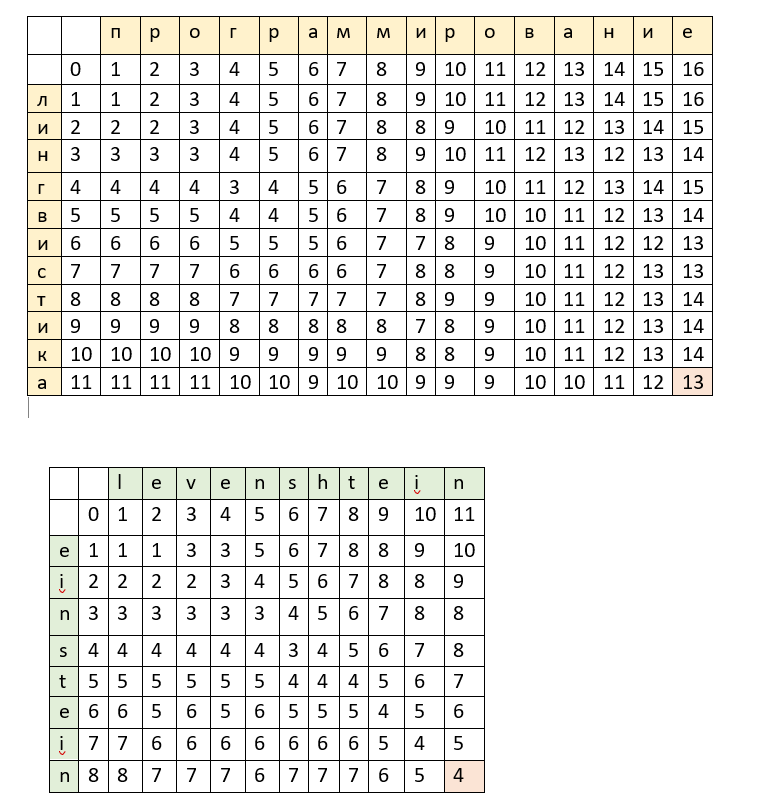




In [27]:
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 64.2 MB/s eta 0:00:00


In [28]:
s1, s2, s3, s4 = 'программирование', 'лингвистика', 'levenshtein', 'einstein'

In [29]:
from Levenshtein import distance as lev

print(lev(s1, s2))
print(lev(s3, s4))

13
4


In [30]:
from nltk.metrics import edit_distance

print(edit_distance(s1, s2))
print(edit_distance(s3, s4))

13
4


### Задание 3

Напишите следующие регулярные выражения:

1. Для поиска электронной почты. Считаем, что адрес может содержать только латинские буквы, цифры, нижнее подчеркивание и дефис (ну и собачку с точками).


In [21]:
import re

In [25]:
text = input('Введите текст: ')
print(*re.findall(r'([a-zA-Z0-9_\-\.]+@[a-zA-Z0-9_\-\.]+\.[a-zA-Z0-9_-]+)', text))

Введите текст: моя почта: 3527.yudina@gmail.com
3527.yudina@gmail.com


2. Для поиска пути файла в операционной системе UNIX или Windows (посмотрите: у них различающиеся стандарты). Регулярному выражению должно быть все равно, какая операционная система. Путь файла может быть абсолютным или относительным, может начинаться на букву диска. Регулярное выражение должно содержать две группы, в одной должно отлавливаться имя файла, а в другой его расширение. (Считаем, что у файла обязательно есть расширение).

In [32]:
regexp = re.compile(r'(.*[\\\/])?([^\\\/]+)\.(\w+)')
file_path = input('Введите путь к фалу: ')
matches = regexp.finditer(file_path)

for match in matches:
  print(match.group())

Введите путь к фалу: C:\Program Files (x86)\Adobe\Adobe Creative Cloud\Utils\Creative Cloud Uninstaller.exe
C:\Program Files (x86)\Adobe\Adobe Creative Cloud\Utils\Creative Cloud Uninstaller.exe


3. Дано предложение:
```
 #[[Time: Обычно"обычно:#frequentative_adverbs_adj:FREQUENTATIVE"] [Experiencer_Metaphoric: бюджет"бюджет:бюджет:BUDGET"] [[ко"к:#preposition:PREPOSITION"] [OrderInTimeAndSpace: второму"второй:TWO_ORDINAL"] Object_Situation: чтению "чтение:READING_OF_THE_DRAFT_LAW"] Predicate: готовится"готовить:готовить:PREPAREDNESS" [[DegreeApproximative: непосредственно"непосредственный:DIRECT_OBLIQUE"] [в"в_Prepositional:#preposition:PREPOSITION"] Locative: Думе"дума:дума:DUMA"]#: [[Agent: депутаты"депутат:депутат:DEPUTY"] Specification_Clause: корректируют"корректировать:корректировать:TO_CORRECT" [[Agent: правительственные"правительство:правительство:GOVERNMENT"] Object_Situation: планы"план:план:SCHEDULE_FOR_ACTIVITY"]]].
 ```
 В этом предложении каждое слово размечено семантической ролью, лексическим классом и семантическим классом. Роль - то, что идет сразу после квадратной скобки до :, потом идет само слово, потом его лемма, а через двоеточие идут лекс. класс и сем. класс (заглавными буквами). Напишите регулярное выражение, которое будет находить 1) сем. роль 2) словоформу 3) лемму 4) лексический класс 5) семантический класс в пяти группах.

In [52]:
# плохо и криво, но как получилось... :..(
regexp = re.compile(r'([A-Z][a-z]+\_?)+|(?:[A-Z]\_?){2,}|(\s[А-Я]?[а-я]+)|(\"[а-я]+)|(:[а-я]+:)|(#([a-z]+\_?)+)')
text = '[[Time: Обычно"обычно:#frequentative_adverbs_adj:FREQUENTATIVE"] [Experiencer_Metaphoric: бюджет"бюджет:бюджет:BUDGET"] [[ко"к:#preposition:PREPOSITION"] [OrderInTimeAndSpace: второму"второй:TWO_ORDINAL"] Object_Situation: чтению "чтение:READING_OF_THE_DRAFT_LAW"] Predicate: готовится"готовить:готовить:PREPAREDNESS" [[DegreeApproximative: непосредственно"непосредственный:DIRECT_OBLIQUE"] [в"в_Prepositional:#preposition:PREPOSITION"] Locative: Думе"дума:дума:DUMA"]#: [[Agent: депутаты"депутат:депутат:DEPUTY"] Specification_Clause: корректируют"корректировать:корректировать:TO_CORRECT" [[Agent: правительственные"правительство:правительство:GOVERNMENT"] Object_Situation: планы"план:план:SCHEDULE_FOR_ACTIVITY"]]]'
matches = regexp.finditer(text)

for match in matches:
  print(match.group())

Time
 Обычно
"обычно
#frequentative_adverbs_adj
FREQUENTATIVE
Experiencer_Metaphoric
 бюджет
"бюджет
:бюджет:
BUDGET
"к
#preposition
PREPOSITION
OrderInTimeAndSpace
 второму
"второй
TWO_ORDINAL
Object_Situation
 чтению
"чтение
READING_OF_THE_DRAFT_LAW
Predicate
 готовится
"готовить
:готовить:
PREPAREDNESS
DegreeApproximative
 непосредственно
"непосредственный
DIRECT_OBLIQUE
"в
Prepositional
#preposition
PREPOSITION
Locative
 Думе
"дума
:дума:
DUMA
Agent
 депутаты
"депутат
:депутат:
DEPUTY
Specification_Clause
 корректируют
"корректировать
:корректировать:
TO_CORRECT
Agent
 правительственные
"правительство
:правительство:
GOVERNMENT
Object_Situation
 планы
"план
:план:
SCHEDULE_FOR_ACTIVITY
